<a href="https://colab.research.google.com/github/ekselan/DS-Unit-2-Kaggle-Challenge/blob/master/module2-random-forests/2_2_2_A_Copy_of_LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import category_encoders as ce

In [281]:
# Start with splitting train data into train and validation set

target = 'status_group'

train, val = train_test_split(train, test_size=0.20, random_state=25,
                              stratify=train[target])

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [6]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
55878,34052,0.0,2013-02-04,Government Of Tanzania,1105,DWE,31.042482,-5.064764,Zahanati,0,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,GeoData Consultants Ltd,VWC,NaN,True,1972,other,other,other,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
59378,38067,500.0,2011-03-21,Rc,2101,ACRA,34.620387,-9.358405,Michael Msigwa,0,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,GeoData Consultants Ltd,VWC,Tove mtwango,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
24064,60585,0.0,2012-10-16,Rwssp,0,DWE,33.521990,-3.876958,Mzee Pembengita,0,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
42655,43927,0.0,2011-03-20,Islamic Found,-20,Is,38.881888,-6.455487,Maramoja,0,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90,True,GeoData Consultants Ltd,WUG,NaN,False,2009,india mark ii,india mark ii,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
28683,54397,0.0,2013-02-17,Danida,1034,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,0,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480,True,GeoData Consultants Ltd,WUG,NaN,False,1989,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [0]:
data = train.copy()

In [12]:
data['population'].value_counts(normalize=True)

# Wanted to look into population and looks like the majority class is zero, 
# which does not seem appropriate - will need to replace these zeros with NaNs

0       0.361153
1       0.117172
200     0.032849
150     0.031881
250     0.028577
          ...   
688     0.000021
912     0.000021
976     0.000021
1040    0.000021
2670    0.000021
Name: population, Length: 981, dtype: float64

#Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
 

In [0]:
def wrangle(df):
    """Wrangle train, validate, and test sets in the same way."""
    
    # Create copy to prevent warnings
    df = df.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    df['latitude'] = df['latitude'].replace(-2e-08, 0)
    
    # Some columns have zeros but probably shouldn't, so replace the zeros with 
    # nulls - will impute later with pipeline
    cols_with_zeros = ['longitude', 'latitude','construction_year','gps_height',
                       'population']
    for col in cols_with_zeros:
        df[col] = df[col].replace(0, np.nan)

    # Quantity & quantity_group are duplicates, so drop one.
    # Also drop num_private which is almost entirely zero and has no description.
    # Payment, management, extraction_type, extraction_type_group, source and
    # waterpoint_type all seem redundant, so drop them as well. Finally, id and
    # recorded_by are not useful for this problem
    df = df.drop(columns=['quantity_group','num_private','payment','management',
                        'extraction_type','extraction_type_group','source',
                        'waterpoint_type','id','recorded_by'])
    
    # Convert date_recorded to only include year (for later use in feature
    # engineering)
    df['date_recorded'] = pd.to_datetime(df['date_recorded'], yearfirst=True)
    df['date_recorded'] = df['date_recorded'].dt.year
    
    # return the wrangled dataframe
    return df

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [35]:
train.shape, val.shape, test.shape

((47520, 31), (11880, 31), (14358, 30))

In [30]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
55878,0.0,2013,Government Of Tanzania,1105.0,DWE,31.042482,-5.064764,Zahanati,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135,True,VWC,NaN,True,1972.0,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
59378,500.0,2011,Rc,2101.0,ACRA,34.620387,-9.358405,Michael Msigwa,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36,True,VWC,Tove mtwango,True,2008.0,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,functional
24064,0.0,2012,Rwssp,NaN,DWE,33.521990,-3.876958,Mzee Pembengita,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,0,False,WUG,NaN,False,NaN,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional
42655,0.0,2011,Islamic Found,-20.0,Is,38.881888,-6.455487,Maramoja,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90,True,WUG,NaN,False,2009.0,handpump,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,functional
28683,0.0,2013,Danida,1034.0,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480,True,WUG,NaN,False,1989.0,handpump,user-group,on failure,soft,good,enough,shallow well,groundwater,hand pump,functional


In [36]:
train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    2920
gps_height               16416
installer                 2931
longitude                 1450
latitude                  1450
wpt_name                     0
basin                        0
subvillage                 307
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               17162
public_meeting            2653
scheme_management         3090
scheme_name              22568
permit                    2452
construction_year        16641
extraction_type_class        0
management_group             0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
source_type                  0
source_class                 0
waterpoint_type_group        0
status_group                 0
dtype: int64

In [209]:
# Define features by simply removing target for now              
features = train.columns.drop([target])
features

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'source_type', 'source_class', 'waterpoint_type_group'],
      dtype='object')

In [210]:
# Specify x feature matrices and y target vectors (no y for test data due to not
# being present in the dataset)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((47520, 30), (47520,), (11880, 30), (11880,), (14358, 30))

#Try Ordinal Encoding.
 

In [0]:
data = train.copy()

In [40]:
encoder = ce.OrdinalEncoder()
data = encoder.fit_transform(data)
print(data.shape)
data.head()

(47520, 31)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
55878,0.0,2013,1,1105.0,1,31.042482,-5.064764,1,1,1,1,16,3,1,1,135.0,1,1,1,1,1972.0,1,1,1,1,1,1,1,1,1,1
59378,500.0,2011,2,2101.0,2,34.620387,-9.358405,2,2,2,2,11,4,2,2,36.0,1,1,2,1,2008.0,2,1,2,1,1,2,2,1,2,2
24064,0.0,2012,3,NaN,1,33.521990,-3.876958,3,3,3,3,17,8,3,3,NaN,2,2,1,2,NaN,1,1,1,1,1,1,1,1,1,1
42655,0.0,2011,4,-20.0,3,38.881888,-6.455487,4,4,4,4,6,1,4,4,90.0,1,2,1,2,2009.0,3,1,3,1,1,2,1,1,3,2
28683,0.0,2013,5,1034.0,4,35.725791,-10.498063,5,5,5,5,10,5,5,5,480.0,1,2,1,2,1989.0,3,1,4,1,1,2,1,1,3,2


In [41]:
data.corr()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
amount_tsh,1.000000,-0.004946,0.003502,0.044762,-0.004240,0.012194,-0.063174,-0.020511,-0.024212,-0.023281,-0.079471,-0.033389,-0.030089,-0.030429,-0.024290,-0.003832,-0.032515,0.014421,0.019638,-0.034836,0.006254,-0.003896,-0.005791,0.089453,-0.023028,-0.023138,-0.016862,0.036640,0.043011,-0.001879,0.045729
date_recorded,-0.004946,1.000000,-0.013942,0.095472,0.031340,0.119505,0.157985,0.038029,0.107187,0.006182,-0.173185,0.166559,0.017356,-0.024411,-0.002649,0.041794,0.145266,0.172805,0.032957,0.024685,0.017899,-0.018956,0.105874,-0.080748,0.052686,0.040919,-0.020610,0.072917,-0.026313,-0.066609,0.012413
funder,0.003502,-0.013942,1.000000,-0.020278,0.553495,0.043454,0.037900,0.009164,-0.003850,0.020809,-0.028153,0.009054,0.037468,0.055321,0.072491,0.054867,0.010906,0.048207,0.048362,-0.039492,0.193797,0.014611,0.101798,-0.003518,0.001361,0.002767,-0.020657,-0.014305,0.014285,0.029447,0.020267
gps_height,0.044762,0.095472,-0.020278,1.000000,-0.036814,-0.571403,0.280544,-0.076270,-0.164106,0.058268,-0.316422,-0.318818,-0.330052,-0.230289,-0.075930,-0.033831,-0.053363,-0.116979,0.143561,0.030249,-0.013604,-0.285530,-0.054859,-0.062536,-0.115191,-0.108441,-0.031118,-0.096906,-0.018168,0.020740,0.132135
installer,-0.004240,0.031340,0.553495,-0.036814,1.000000,0.075287,0.034111,0.029521,0.024356,0.020467,0.016442,0.052886,0.075967,0.086262,0.091408,0.060540,0.030456,0.060929,0.076327,-0.031022,0.167905,0.059613,0.106958,0.021867,0.021417,0.029236,-0.007415,0.063873,0.015069,-0.006857,-0.018417
longitude,0.012194,0.119505,0.043454,-0.571403,0.075287,1.000000,-0.299485,-0.007595,0.307102,-0.102844,0.159656,0.146212,0.249671,0.177197,0.011344,-0.109048,-0.006261,0.154390,0.110455,-0.021996,0.025711,0.195216,0.010904,0.148024,0.005726,0.005252,-0.047991,0.104280,-0.048262,-0.194298,-0.057755
latitude,-0.063174,0.157985,0.037900,0.280544,0.034111,-0.299485,1.000000,0.068632,-0.038636,0.100133,-0.068476,-0.244301,-0.193587,-0.040330,0.037855,0.052071,0.020522,0.094944,0.034660,-0.087603,0.037133,-0.027762,0.090868,-0.110772,0.042328,0.040864,-0.151725,-0.116126,-0.025676,0.073413,0.024932
wpt_name,-0.020511,0.038029,0.009164,-0.076270,0.029521,-0.007595,0.068632,1.000000,0.057313,0.296554,0.063716,-0.014159,0.008708,-0.017693,-0.007966,-0.016489,0.014539,0.049217,0.001863,-0.028807,-0.001746,0.002120,-0.031958,-0.012895,-0.006154,-0.005400,-0.022970,-0.007178,-0.003512,0.018818,-0.013573
basin,-0.024212,0.107187,-0.003850,-0.164106,0.024356,0.307102,-0.038636,0.057313,1.000000,0.007515,0.097637,0.165158,0.111310,0.113499,0.087614,-0.053596,0.061604,-0.032649,0.036667,0.038158,-0.081174,-0.023295,-0.010371,0.061887,-0.044551,-0.044594,-0.027308,-0.057213,-0.109341,-0.068368,-0.059122
subvillage,-0.023281,0.006182,0.020809,0.058268,0.020467,-0.102844,0.100133,0.296554,0.007515,1.000000,-0.030024,0.001310,-0.031383,0.000965,0.139452,0.032391,0.018458,-0.044165,0.028668,-0.010245,-0.008280,-0.038381,-0.023842,-0.044176,0.017167,0.017365,0.006131,-0.066532,-0.046115,0.076319,-0.010097


In [0]:
# Construction year looks like it may be relevant, so I'll see if the time from 
# inspection has a similar correlation to status_group
data['construction_vs_inspection_years'] = data['construction_year'] - data['date_recorded']

In [44]:
data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,construction_vs_inspection_years
55878,0.0,2013,1,1105.0,1,31.042482,-5.064764,1,1,1,1,16,3,1,1,135.0,1,1,1,1,1972.0,1,1,1,1,1,1,1,1,1,1,-41.0
59378,500.0,2011,2,2101.0,2,34.620387,-9.358405,2,2,2,2,11,4,2,2,36.0,1,1,2,1,2008.0,2,1,2,1,1,2,2,1,2,2,-3.0
24064,0.0,2012,3,NaN,1,33.521990,-3.876958,3,3,3,3,17,8,3,3,NaN,2,2,1,2,NaN,1,1,1,1,1,1,1,1,1,1,NaN
42655,0.0,2011,4,-20.0,3,38.881888,-6.455487,4,4,4,4,6,1,4,4,90.0,1,2,1,2,2009.0,3,1,3,1,1,2,1,1,3,2,-2.0
28683,0.0,2013,5,1034.0,4,35.725791,-10.498063,5,5,5,5,10,5,5,5,480.0,1,2,1,2,1989.0,3,1,4,1,1,2,1,1,3,2,-24.0


In [45]:
data.corr()
# Looks like this may be a useful feature to add ...

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,construction_vs_inspection_years
amount_tsh,1.000000,-0.004946,0.003502,0.044762,-0.004240,0.012194,-0.063174,-0.020511,-0.024212,-0.023281,-0.079471,-0.033389,-0.030089,-0.030429,-0.024290,-0.003832,-0.032515,0.014421,0.019638,-0.034836,0.006254,-0.003896,-0.005791,0.089453,-0.023028,-0.023138,-0.016862,0.036640,0.043011,-0.001879,0.045729,0.009574
date_recorded,-0.004946,1.000000,-0.013942,0.095472,0.031340,0.119505,0.157985,0.038029,0.107187,0.006182,-0.173185,0.166559,0.017356,-0.024411,-0.002649,0.041794,0.145266,0.172805,0.032957,0.024685,0.017899,-0.018956,0.105874,-0.080748,0.052686,0.040919,-0.020610,0.072917,-0.026313,-0.066609,0.012413,-0.060272
funder,0.003502,-0.013942,1.000000,-0.020278,0.553495,0.043454,0.037900,0.009164,-0.003850,0.020809,-0.028153,0.009054,0.037468,0.055321,0.072491,0.054867,0.010906,0.048207,0.048362,-0.039492,0.193797,0.014611,0.101798,-0.003518,0.001361,0.002767,-0.020657,-0.014305,0.014285,0.029447,0.020267,0.198112
gps_height,0.044762,0.095472,-0.020278,1.000000,-0.036814,-0.571403,0.280544,-0.076270,-0.164106,0.058268,-0.316422,-0.318818,-0.330052,-0.230289,-0.075930,-0.033831,-0.053363,-0.116979,0.143561,0.030249,-0.013604,-0.285530,-0.054859,-0.062536,-0.115191,-0.108441,-0.031118,-0.096906,-0.018168,0.020740,0.132135,-0.021606
installer,-0.004240,0.031340,0.553495,-0.036814,1.000000,0.075287,0.034111,0.029521,0.024356,0.020467,0.016442,0.052886,0.075967,0.086262,0.091408,0.060540,0.030456,0.060929,0.076327,-0.031022,0.167905,0.059613,0.106958,0.021867,0.021417,0.029236,-0.007415,0.063873,0.015069,-0.006857,-0.018417,0.167491
longitude,0.012194,0.119505,0.043454,-0.571403,0.075287,1.000000,-0.299485,-0.007595,0.307102,-0.102844,0.159656,0.146212,0.249671,0.177197,0.011344,-0.109048,-0.006261,0.154390,0.110455,-0.021996,0.025711,0.195216,0.010904,0.148024,0.005726,0.005252,-0.047991,0.104280,-0.048262,-0.194298,-0.057755,0.032682
latitude,-0.063174,0.157985,0.037900,0.280544,0.034111,-0.299485,1.000000,0.068632,-0.038636,0.100133,-0.068476,-0.244301,-0.193587,-0.040330,0.037855,0.052071,0.020522,0.094944,0.034660,-0.087603,0.037133,-0.027762,0.090868,-0.110772,0.042328,0.040864,-0.151725,-0.116126,-0.025676,0.073413,0.024932,0.015778
wpt_name,-0.020511,0.038029,0.009164,-0.076270,0.029521,-0.007595,0.068632,1.000000,0.057313,0.296554,0.063716,-0.014159,0.008708,-0.017693,-0.007966,-0.016489,0.014539,0.049217,0.001863,-0.028807,-0.001746,0.002120,-0.031958,-0.012895,-0.006154,-0.005400,-0.022970,-0.007178,-0.003512,0.018818,-0.013573,-0.007878
basin,-0.024212,0.107187,-0.003850,-0.164106,0.024356,0.307102,-0.038636,0.057313,1.000000,0.007515,0.097637,0.165158,0.111310,0.113499,0.087614,-0.053596,0.061604,-0.032649,0.036667,0.038158,-0.081174,-0.023295,-0.010371,0.061887,-0.044551,-0.044594,-0.027308,-0.057213,-0.109341,-0.068368,-0.059122,-0.097976
subvillage,-0.023281,0.006182,0.020809,0.058268,0.020467,-0.102844,0.100133,0.296554,0.007515,1.000000,-0.030024,0.001310,-0.031383,0.000965,0.139452,0.032391,0.018458,-0.044165,0.028668,-0.010245,-0.008280,-0.038381,-0.023842,-0.044176,0.017167,0.017365,0.006131,-0.066532,-0.046115,0.076319,-0.010097,-0.008993


In [0]:
train['construction_vs_inspection_years'] = train['construction_year'] - train['date_recorded']
val['construction_vs_inspection_years'] = val['construction_year'] - val['date_recorded']
test['construction_vs_inspection_years'] = test['construction_year'] - test['date_recorded']

In [0]:
# Now I'll apply a pipeline using OrdinalEncoding and DecisionTreeClassifier to 
# see if that improves results

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=25, min_samples_leaf=11, max_depth=18)
)

In [52]:
# Apply pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'wpt_name',
                                      'basin', 'subvillage', 'region', 'lga',
                                      'ward', 'public_meeting',
                                      'scheme_management', 'scheme_name',
                                      'permit', 'extraction_type_class',
                                      'management_group', 'payment_type',
                                      'water_quality', 'quality_group',
                                      'quantity', 'source_type', 'source_class',
                                      'waterpoint_type_g...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=18,
                                        max_features=None, ma

In [53]:
print(f'Train Accuracy(DecisionTree): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(DecisionTree): {pipeline.score(X_val, y_val):%}')

Train Accuracy(DecisionTree): 82.769360%
Validation Accuracy(DecisionTree): 75.143098%


#Try a Random Forest Classifier.


In [0]:
# Now I'll use this with Random Forest

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier()
)

In [55]:
# Apply pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'wpt_name',
                                      'basin', 'subvillage', 'region', 'lga',
                                      'ward', 'public_meeting',
                                      'scheme_management', 'scheme_name',
                                      'permit', 'extraction_type_class',
                                      'management_group', 'payment_type',
                                      'water_quality', 'quality_group',
                                      'quantity', 'source_type', 'source_class',
                                      'waterpoint_type_g...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samp

In [56]:
print(f'Train Accuracy(DecisionTree): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(DecisionTree): {pipeline.score(X_val, y_val):%}')

# 100% on the train data, so definitely looks like it's overfitting, but still an
# improvement

Train Accuracy(DecisionTree): 100.000000%
Validation Accuracy(DecisionTree): 80.260943%


### Plot feature importances

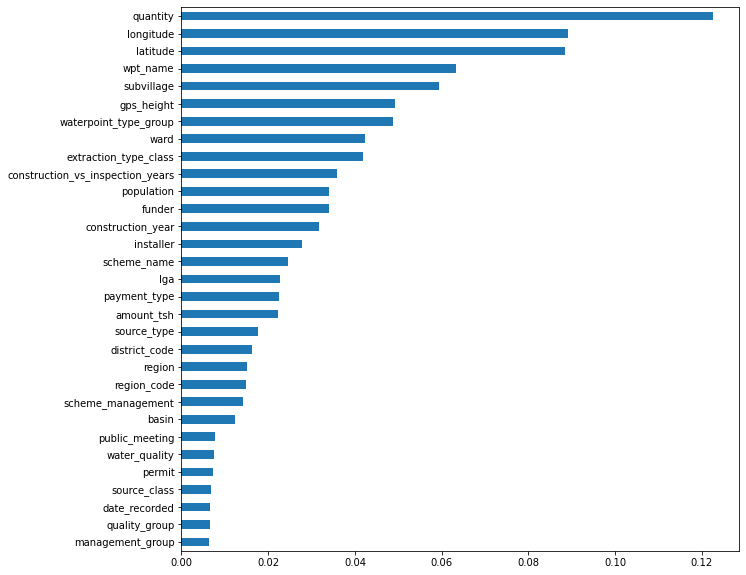

In [61]:
model = pipeline.named_steps['randomforestclassifier']
encoded = pipeline.named_steps['ordinalencoder']
encoded_cols = encoded.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_cols)
plt.figure(figsize=(10,10))
importances.sort_values().plot.barh();

#Submit your predictions to our Kaggle competition. 

In [62]:
y_pred = pipeline.predict(X_test)
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [66]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [0]:
submission.to_csv('tanzania_water_submission_april_14.csv', index=False)

# Tune parameters of RandomForestClassifier to improve results

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=25, n_estimators=75, max_depth=30,
                           min_samples_split=14)
)

In [213]:
# Apply pipeline
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'wpt_name',
                                      'basin', 'subvillage', 'region', 'lga',
                                      'ward', 'public_meeting',
                                      'scheme_management', 'scheme_name',
                                      'permit', 'extraction_type_class',
                                      'management_group', 'payment_type',
                                      'water_quality', 'quality_group',
                                      'quantity', 'source_type', 'source_class',
                                      'waterpoint_type_g...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=30, max_features='auto',
                                        max_leaf_nodes=None, max_sample

In [203]:
print(f'Train Accuracy(DecisionTree): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(DecisionTree): {pipeline.score(X_val, y_val):%}')

Train Accuracy(DecisionTree): 90.002104%
Validation Accuracy(DecisionTree): 80.547138%


In [214]:
y_pred = pipeline.predict(X_test)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [216]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [0]:
submission.to_csv('tanzania_water_submission2_april_14.csv', index=False)

### Iteration 3
- What happens with fewer features?

In [0]:
features = ['quantity','longitude','latitude','wpt_name','subvillage','gps_height',
 'waterpoint_type_group','ward','extraction_type_class',
 'construction_vs_inspection_years','population']

target = 'status_group'

In [0]:
features = ['quantity','longitude','latitude','wpt_name','subvillage',
            'gps_height',]

target = 'status_group'

In [228]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,construction_vs_inspection_years
55878,0.0,2013,Government Of Tanzania,1105.0,DWE,31.042482,-5.064764,Zahanati,Lake Tanganyika,Mganza Kati,Kigoma,16,3,Kigoma Rural,Mtego wa Noti,135.0,True,VWC,NaN,True,1972.0,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional,-41.0
59378,500.0,2011,Rc,2101.0,ACRA,34.620387,-9.358405,Michael Msigwa,Rufiji,Igelango,Iringa,11,4,Njombe,Imalinyi,36.0,True,VWC,Tove mtwango,True,2008.0,gravity,user-group,monthly,soft,good,enough,spring,groundwater,communal standpipe,functional,-3.0
24064,0.0,2012,Rwssp,NaN,DWE,33.521990,-3.876958,Mzee Pembengita,Internal,Itubula,Shinyanga,17,8,Kishapu,Itilima,NaN,False,WUG,NaN,False,NaN,other,user-group,unknown,soft,good,insufficient,shallow well,groundwater,other,non functional,NaN
42655,0.0,2011,Islamic Found,-20.0,Is,38.881888,-6.455487,Maramoja,Wami / Ruvu,Magomeni B,Pwani,6,1,Bagamoyo,Magomeni,90.0,True,WUG,NaN,False,2009.0,handpump,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,functional,-2.0
28683,0.0,2013,Danida,1034.0,DANIAD,35.725791,-10.498063,Kwa Beda Njogopa,Lake Nyasa,Ilala,Ruvuma,10,5,Namtumbo,Msindo,480.0,True,WUG,NaN,False,1989.0,handpump,user-group,on failure,soft,good,enough,shallow well,groundwater,hand pump,functional,-24.0


In [235]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((47520, 6), (47520,), (11880, 6), (11880,), (14358, 6))

In [236]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=25, n_estimators=75, max_depth=30,
                           min_samples_split=14)
)

pipeline.fit(X_train, y_train)

print(f'Train Accuracy(DecisionTree): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(DecisionTree): {pipeline.score(X_val, y_val):%}')

Train Accuracy(DecisionTree): 88.691077%
Validation Accuracy(DecisionTree): 70.286195%


In [0]:
# Looks like reducing features is only making it worse, so will try adding a
# few more

### Iteration 4
- add more features

In [0]:
# I'll try it this time without removing as many features, and increase the 
# feature engineering 

def wrangle(df):
    """Wrangle train, validate, and test sets in the same way."""
    
    # Create copy to prevent warnings
    df = df.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    df['latitude'] = df['latitude'].replace(-2e-08, 0)
    
    # Some columns have zeros but probably shouldn't, so replace the zeros with 
    # nulls - will impute later with pipeline
    cols_with_zeros = ['longitude', 'latitude','construction_year','gps_height',
                       'population']
    for col in cols_with_zeros:
        df[col] = df[col].replace(0, np.nan)

    # Payment, management, extraction_type, extraction_type_group, source and
    # waterpoint_type all seem redundant, so drop them. Also, id and
    # recorded_by are not useful for this problem.
    df = df.drop(columns=['payment','management',
                        'extraction_type','extraction_type_group','source',
                        'id','recorded_by'])
    
    # Convert date_recorded to only include year 
    df['date_recorded'] = pd.to_datetime(df['date_recorded'], yearfirst=True)
    df['date_recorded'] = df['date_recorded'].dt.year

    # Construction year looks like it may be relevant, so I'll see if the time 
    # from inspection has a similar correlation to status_group
    df['construction_vs_inspection_years'] = df['construction_year'] - df['date_recorded']

    # 'water_quality' looks interesting as I may expect water sources that produce
    # anything other than "soft" water may have some issues ...
    df['water_quality'] = (df['water_quality']=='soft').astype(int)  

    # 'quantity' of the water should tell us something if it's anything other
    # than 'enough'
    df['enough_water'] = (df['quantity']=='enough').astype(int)

    # Noticed that majority of these waterpoints do not have a name, and I would
    # think that a waterpoint built with care/pride would be named. 
    df['has_name'] = (df['wpt_name']!='none').astype(int)

    
    # return the wrangled dataframe
    return df

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [283]:
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((47520, 36), (47520,), (11880, 36), (11880,), (14358, 36))

In [291]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=25, n_estimators=80, max_depth=31,
                           min_samples_split=11)
)

pipeline.fit(X_train, y_train)

print(f'Train Accuracy(DecisionTree): {pipeline.score(X_train, y_train):%}')
print(f'Validation Accuracy(DecisionTree): {pipeline.score(X_val, y_val):%}')

# Very slight, but looks like an improvement. I'll see how this performs on the
# test data

Train Accuracy(DecisionTree): 91.660354%
Validation Accuracy(DecisionTree): 80.867003%


In [275]:
y_pred = pipeline.predict(X_test)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [277]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
submission

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14353,39307,non functional
14354,18990,functional
14355,28749,functional
14356,33492,functional


In [0]:
submission.to_csv('tanzania_water_submission3_april_14.csv', index=False)